In [85]:
import pandas, numpy

# Initializes data
data = pandas.read_csv('clint.csv').drop('Unnamed: 0', 1)
data = data[data.message.notnull()]

In [86]:
#Create a set of all the users who chat during the vod
uniqueChatters = set(data['from'].tolist())
#Print the number of unique chatters
print("Number of Unique Chatters: " + str(len(uniqueChatters)))

Number of Unique Chatters: 1459


In [87]:
import datetime
#Create a column of tags for each minute of the vod
data['minute'] = [datetime.datetime.fromtimestamp(x/1000.).strftime('%m/%d %H:%M') for x in data.timestamp]

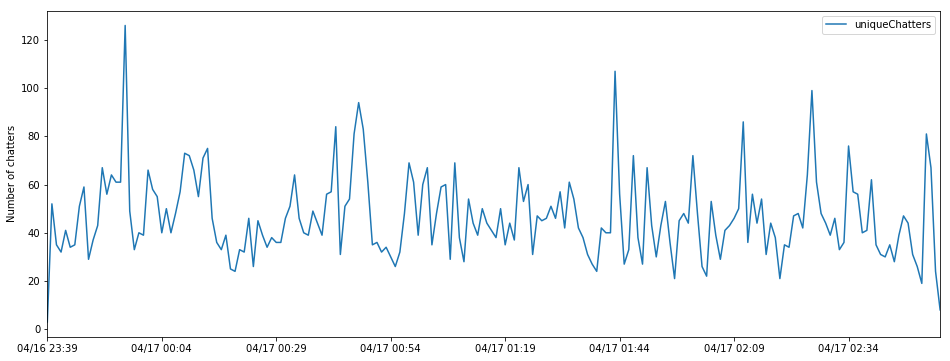

In [88]:
#Group the messages by minute
g = data.groupby('minute')
uniquesByMinute = pandas.DataFrame(columns = ['uniqueChatters'])
for x, y in g:
    #Get the length of the set of unique chatters from this minute of the VOD
    uniquesByMinute.loc[x, 'uniqueChatters']= len(set(y['from'].tolist()))
    
#Graph the number of unique chatters in each minute of the vod
%matplotlib inline
ax = uniquesByMinute.plot()
ax.set_ylabel("Number of chatters")
ax.figure.set_size_inches(16, 6, forward=True)